In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
use_cols = [
    'Pclass','Sex','Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('data/titanic.csv', usecols=use_cols)

In [26]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [31]:
def get_dtypes(data,drop_col = []):

    """
    Return the dtypes for each column of a pandas Dataframe
    Parameters
    ----------
    data : pandas Dataframe
    drop_col : columns to omit in a list
    Returns
    -------
    str_var_list, num_var_list, all_var_list
    """
    name_of_col = list(data.columns)
    str_var_list = []
    num_var_list = []
    all_var_list = []
    
    str_var_list = name_of_col.copy() # we have take first only the entire copy of list,then we can remove the elements
    for var in name_of_col:
        if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float, np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
          
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        
        if var in num_var_list:
            num_var_list.remove(var)
            
    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    
    return str_var_list, num_var_list, all_var_list


In [52]:
def describe(data,output_path = None):
    """
    output the general description of a  pandas Dataframe
    into a csv file
    
    """
    result = data.describe(include = 'all')
    if output_path is not None:
        output = os.path.join(output_path,'describe.csv')
        result.to_csv(output)
        print('result saved at :',str(output))
    return result

In [54]:
def discrete_var_barplot(x,y,data,output_path = None):
    """
    draw the barplot of a discrete variable x against y(target variable). 
    By default the bar shows the mean value of y.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize = (12,6))
    sns.barplot(x = x,y = y,data = data)
    if output_path is not None:
        output = os.path.join(output_path,'Barplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)
        print('image saved at :',str(output))

In [57]:
def discrete_var_countplot(x,data,output_path = None):
    """
    draw the countplot of a discrete variable x
    ----------
    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize = (12,6))
    sns.countplot(x = x,data = data)
    if output_path is not None:
        output = os.path.join(output_path,'countplot_'+str(x)+'.png')
        plt.savefig(output)
        print('image saved at :',str(output))

In [60]:
def discrete_var_boxplot(x,y,data,output_path = None):
    """
    draw the boxplot of a discrete variable x against y.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize = (12,6))
    sns.boxplot(x = x,y = y,data = data)
    if output_path is not None:
        output = os.path.join(output_path,'boxplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)
        print('image saved at :',str(output))

image saved at : ./output/boxplot_Pclass_Fare.png


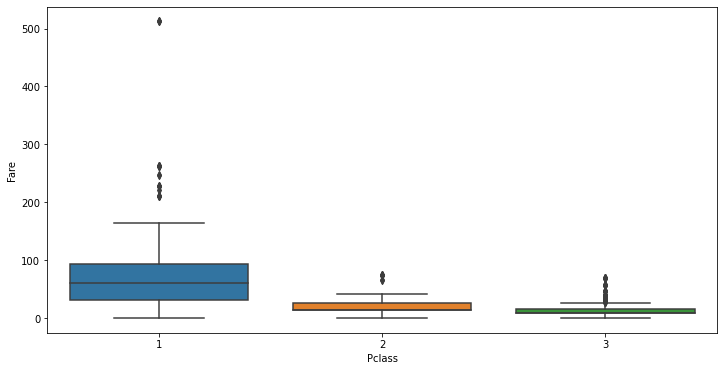

In [62]:
discrete_var_boxplot(x='Pclass',y = 'Fare',data=data,output_path='./output/')

In [45]:
describe(data=data,output_path=r'./output/')

result saved at : ./output/describe.csv


,Survived,Pclass,Sex,Age,SibSp,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,31.000000


In [32]:
str_var_list, num_var_list, all_var_list = get_dtypes(data=data)
print(str_var_list) # String type
print(num_var_list) # Numeric type
print(all_var_list) # All

['Sex']
['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
['Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare']


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB
